In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('~/styles/clarke-default.mplstyle')
import trimesh

### Load the mesh and extract some parameters

In [7]:
# load the stl file defining the extraction region
# mesh = trimesh.load_mesh('/home/clarke/stl/ExtractionRegion.stl')
mesh = trimesh.load_mesh('/home/clarke/stl/LXe.stl')
vertices = mesh.vertices

# offset to bring extraction region to its actual size
z_offset = 6.493

# find the coordinates and radius
min_z = np.min(vertices[:, 2])
max_z = np.max(vertices[:, 2])
bottom_points = vertices[np.isclose(vertices[:, 2], min_z)]
top_points = vertices[np.isclose(vertices[:, 2], max_z)]
bottom_center = np.mean(bottom_points, axis=0)
top_center = np.mean(top_points, axis=0)
radius = np.mean(np.linalg.norm(bottom_points[:,:2] - bottom_center[:2], axis=1))
height = max_z - min_z

### Generate some points along the liquid surface

In [18]:
n_points = 100_000
points_rt = np.random.uniform([0., 0.], [radius**2, 2.*np.pi], size=(n_points, 2))
points_rt[:, 0] = np.sqrt(points_rt[:, 0])
points_rtz = np.hstack([points_rt, (max_z + z_offset)*np.ones(n_points)[:, np.newaxis]])

points_xyz = np.zeros_like(points_rtz)
points_xyz[:, 0] = points_rtz[:, 0] * np.cos(points_rtz[:, 1])
points_xyz[:, 1] = points_rtz[:, 0] * np.sin(points_rtz[:, 1])
points_xyz[:, 2] = points_rtz[:, 2]

Text(0.5, 0.98, 'Points sampled in extraction region')

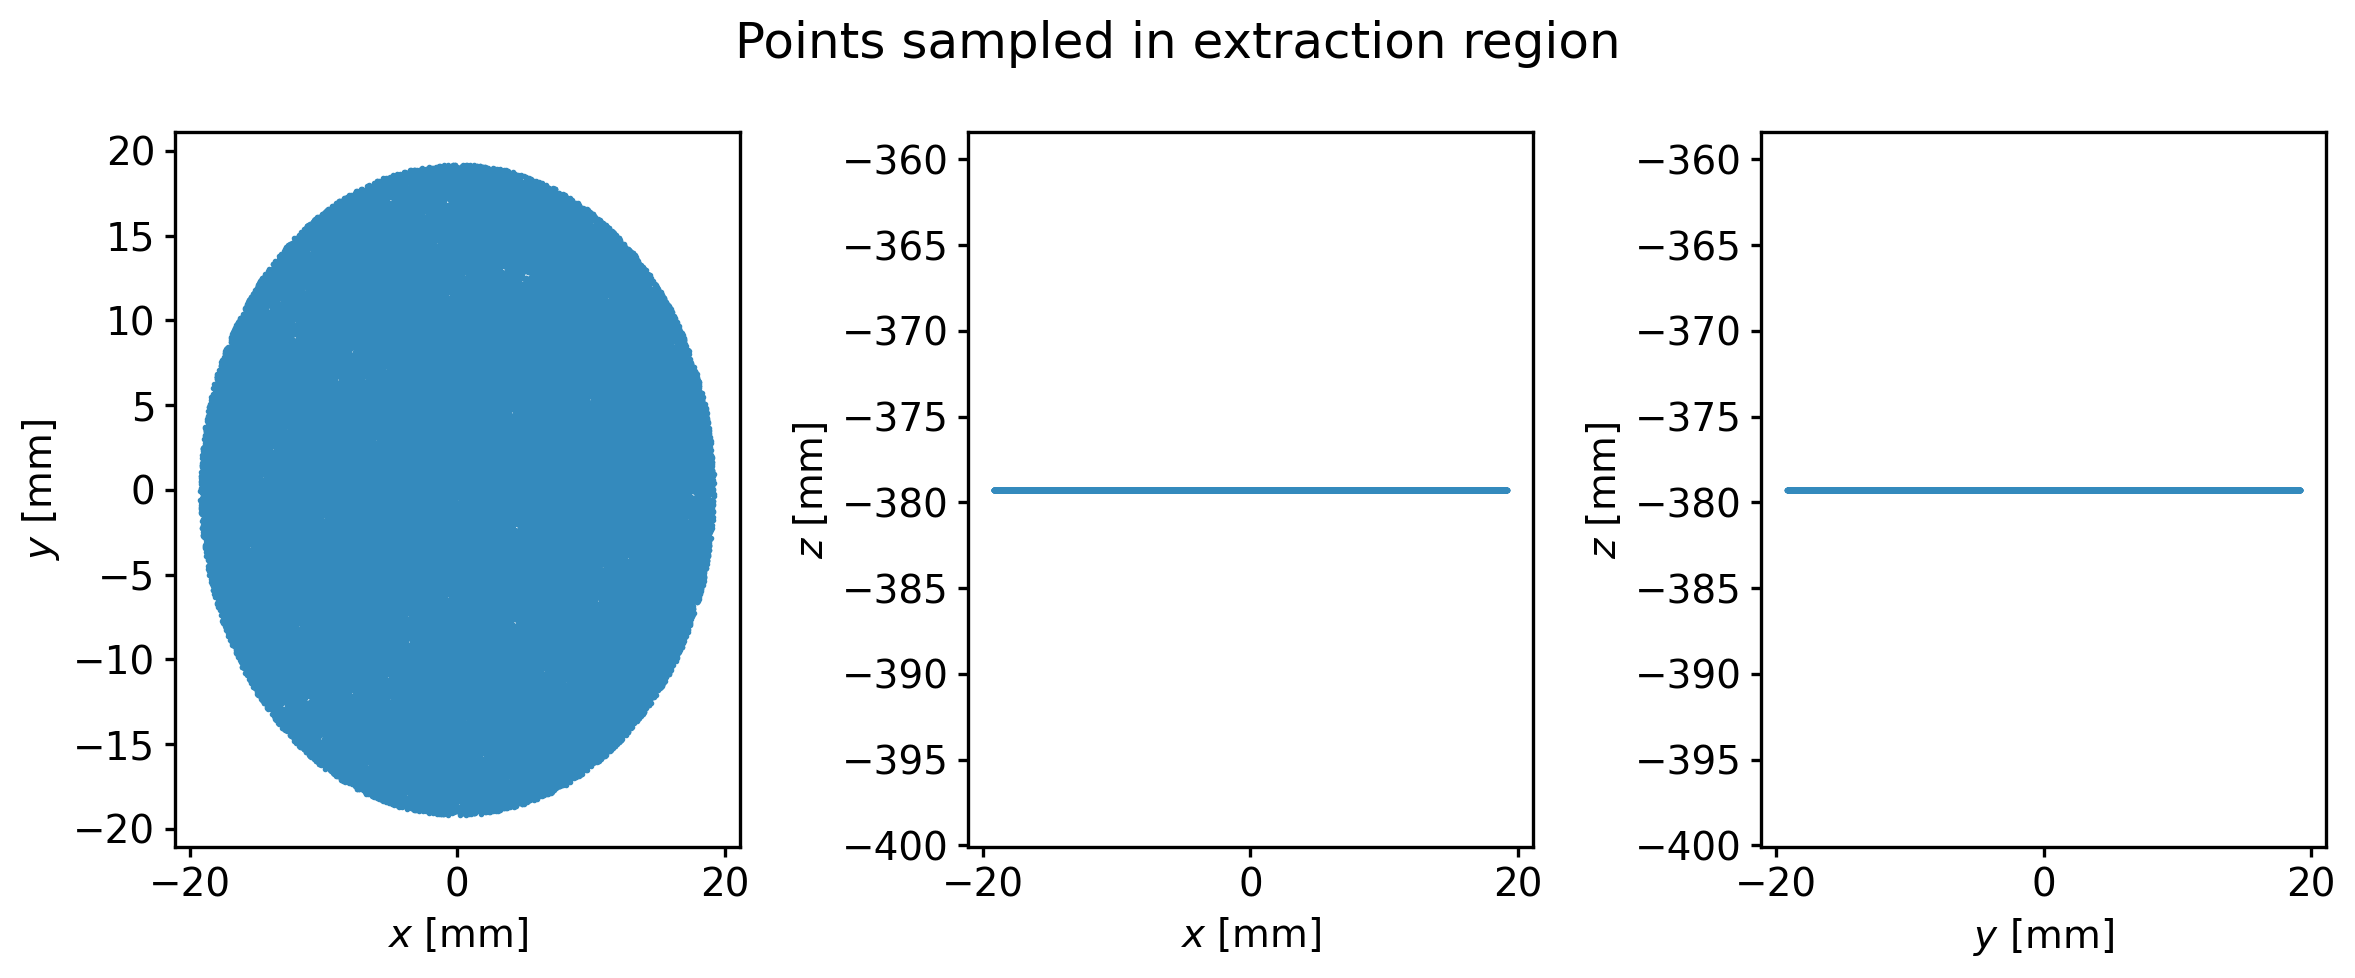

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax1, ax2, ax3 = ax

ax1.scatter(points_xyz[:, 0], points_xyz[:, 1], s=1)
ax1.set_xlabel('$x$ [mm]')
ax1.set_ylabel('$y$ [mm]')

ax2.scatter(points_xyz[:, 0], points_xyz[:, 2], s=1)
ax2.set_xlabel('$x$ [mm]')
ax2.set_ylabel('$z$ [mm]')

ax3.scatter(points_xyz[:, 1], points_xyz[:, 2], s=1)
ax3.set_xlabel('$y$ [mm]')
ax3.set_ylabel('$z$ [mm]')

fig.suptitle('Points sampled in extraction region')

### Save the points to a file
Make sure to rerun the random point generation between running the next two cells!

In [10]:
np.save('chroma-lxe/data/XeNu_LXe_surface_points.npy', points_xyz, allow_pickle=False)

In [20]:
np.save('chroma-lxe/data/XeNu_LXe_surface_points_site2.npy', points_xyz, allow_pickle=False)

### Check the $z$-position of the PMTs

In [23]:
mesh = trimesh.load_mesh('/home/clarke/stl/PMT1_shifted.stl')
vertices = mesh.vertices

# offset to bring extraction region to its actual size
z_offset = 6.493

# find the coordinates and radius
min_z = np.min(vertices[:, 2])

### Verify that the two positions are different

In [21]:
site1 = np.load('chroma-lxe/data/XeNu_LXe_surface_points.npy')
site2 = np.load('chroma-lxe/data/XeNu_LXe_surface_points_site2.npy')
print(site1[:5,:])
print(site2[:5,:])

[[   5.97218775   -2.63318069 -379.26258472]
 [ -12.74641413   -9.05029424 -379.26258472]
 [  18.16618787   -3.42306008 -379.26258472]
 [  -4.00565349  -18.59861012 -379.26258472]
 [  -3.45958333   12.34682531 -379.26258472]]
[[-6.70823277e+00  1.03218800e+01 -3.79262585e+02]
 [ 1.31278162e+01 -2.60341714e-01 -3.79262585e+02]
 [-7.61528321e+00  1.64135455e+01 -3.79262585e+02]
 [-9.58230719e+00  1.07728350e+01 -3.79262585e+02]
 [-6.46507636e+00  1.78359016e+01 -3.79262585e+02]]
